<a href="https://colab.research.google.com/github/jmvalenciae/Object-Distance-Detector/blob/master/OBDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade opencv-python

     |████████████████████████████████| 28.2MB 113kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [0]:
!git clone https://github.com/jmvalenciae/Object-Distance-Detector
%cd Object-Distance-Detector
!ls ..

Cloning into 'Object-Distance-Detector'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 75 (delta 30), reused 65 (delta 20), pack-reused 0
Unpacking objects: 100% (75/75), done.
/content/Object-Distance-Detector
drive  Object-Distance-Detector  sample_data


In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://pjreddie.com/media/files/yolov3-tiny.weights
!mv yolov3.weights weights/
!mv yolov3-tiny.weights weights/

--2020-05-24 03:48:11--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   874KB/s    in 5m 0s   

2020-05-24 03:53:12 (807 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2020-05-24 03:53:13--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M   687KB/s    in 48s     

2020-05-24 03:54:03 (720 KB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [0]:
# !wget https://motchallenge.net/data/2DMOT2015.zip
!wget https://motchallenge.net/data/3DMOT2015.zip
!unzip 3DMOT2015.zip

--2020-05-24 03:54:07--  https://motchallenge.net/data/3DMOT2015.zip
Resolving motchallenge.net (motchallenge.net)... 131.159.19.34, 2a09:80c0:18::1034
Connecting to motchallenge.net (motchallenge.net)|131.159.19.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247256066 (236M) [application/zip]
Saving to: ‘3DMOT2015.zip’

3DMOT2015.zip       100%[===================>] 235.80M  11.0MB/s    in 24s     

2020-05-24 03:54:32 (9.95 MB/s) - ‘3DMOT2015.zip’ saved [247256066/247256066]

Archive:  3DMOT2015.zip
   creating: 3DMOT2015/
   creating: 3DMOT2015/test/
   creating: 3DMOT2015/test/PETS09-S2L2/
   creating: 3DMOT2015/test/PETS09-S2L2/maps/
  inflating: 3DMOT2015/test/PETS09-S2L2/maps/View_001.xml  
  inflating: 3DMOT2015/test/PETS09-S2L2/maps/View_001.txt  
   creating: 3DMOT2015/test/PETS09-S2L2/det/
  inflating: 3DMOT2015/test/PETS09-S2L2/det/000001-acf.jpg  
  inflating: 3DMOT2015/test/PETS09-S2L2/det/det.txt  
   creating: 3DMOT2015/test/PETS09-S2L2/img

In [0]:
from lib import model
from lib import utils
import cv2
import matplotlib.pyplot as plt
import time
import numpy as np
%matplotlib inline

In [0]:
net_v3 = model.yolo("cfg/yolov3.cfg", "weights/yolov3.weights", "coco.names")
net_tiny = model.yolo("cfg/yolov3-tiny.cfg", "weights/yolov3-tiny.weights", "coco.names")

In [0]:
IMG_PATH = '3DMOT2015/train/PETS09-S2L1/img1/'
LABEL_PATH = '3DMOT2015/train/PETS09-S2L1/gt/gt.txt'

with open(LABEL_PATH, "r") as file:
    data = [i.strip().split(",") for i in file.readlines()]

data = np.array(data).astype(np.float)
labels = [data[data[:,0] == i+1, 2:7].astype(int) for i in range(int(data[-1,0]))]

imgs = []
for i in range(len(labels)):
    imgs.append(plt.imread(IMG_PATH+('%6d.jpg'%(i+1)).replace(' ', '0')))

In [0]:
APsv3 = []
Aps_tiny = []
inference_timev3 = []
inference_time_tiny = []
for i,img in enumerate(imgs):
    t1 = time.time()
    boxes, confs = net_v3.predict(img)
    t2 = time.time()
    APsv3.append(utils.Average_Prec(boxes, labels[i][:,0:4], confs))
    inference_timev3.append(1/(t2-t1))

    t1 = time.time()
    boxes_tiny, confs_tiny = net_tiny.predict(img)
    t2 = time.time()
    Aps_tiny.append(utils.Average_Prec(boxes_tiny, labels[i][:,0:4], confs_tiny))
    inference_time_tiny.append(1/(t2-t1))

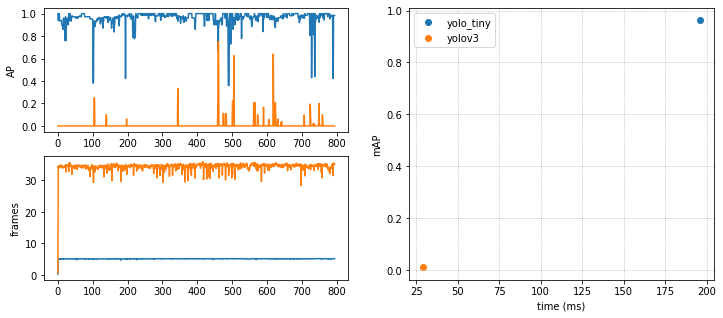

In [0]:

models = ["yolo_tiny", "yolov3"]
mrs= {"AP":[APsv3, Aps_tiny],
      "fps": [inference_timev3, inference_time_tiny]}


plt.figure(figsize=(12,5))
ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(122)


for i,name in enumerate(models):
    ax1.plot(mrs["AP"][i], label = name)
    ax2.plot(mrs["fps"][i], label = name)
    ax3.scatter(1e3/np.mean(mrs["fps"][i]), np.mean(mrs["AP"][i]), label = name)
    
    ax1.set_ylabel("AP")
    ax2.set_ylabel(r"$fps$")
    ax2.set_ylabel("frames")
    ax3.set_xlabel("time (ms)")
    ax3.set_ylabel("mAP")
    ax3.legend(); ax3.grid(linestyle=":")
plt.savefig('rendimiento.png')
plt.show()
# ax1.plot(APsv3, label = )
# ax1.plot(Aps_tiny, label="yolo_tiny")


# ax2.plot(inference_time_tiny, label = "yolo_tiny")
# ax2.plot(inference_timev3)

# ax3.scatter(np.mean(inference_time_tiny), np.mean(Aps_tiny))
# ax3.scatter(np.mean(inference_timev3), np.mean(APsv3))


<Figure size 432x288 with 0 Axes>